In [1]:
# Import du jeu de donnée
import pandas as pd
import numpy as np

# copy on write

df = pd.read_csv('fr.openfoodfacts.org.products.csv',sep = '\t',low_memory=False)
# On affiche les colonnes
df.describe()

,no_nutriments,additives_n,ingredients_from_palm_oil_n,ingredients_from_palm_oil,ingredients_that_may_be_from_palm_oil_n,ingredients_that_may_be_from_palm_oil,nutrition_grade_uk,energy_100g,energy-from-fat_100g,fat_100g,...,ph_100g,fruits-vegetables-nuts_100g,collagen-meat-protein-ratio_100g,cocoa_100g,chlorophyl_100g,carbon-footprint_100g,nutrition-score-fr_100g,nutrition-score-uk_100g,glycemic-index_100g,water-hardness_100g
count,0.0,248939.000000,248939.000000,0.0,248939.000000,0.0,0.0,2.611130e+05,857.000000,243891.000000,...,49.000000,3036.000000,165.000000,948.000000,0.0,268.000000,221210.000000,221210.000000,0.0,0.0
mean,NaN,1.936024,0.019659,NaN,0.055246,NaN,NaN,1.141915e+03,585.501214,12.730379,...,6.425698,31.458587,15.412121,49.547785,NaN,341.700764,9.165535,9.058049,NaN,NaN
std,NaN,2.502019,0.140524,NaN,0.269207,NaN,NaN,6.447154e+03,712.809943,17.578747,...,2.047841,31.967918,3.753028,18.757932,NaN,425.211439,9.055903,9.183589,NaN,NaN
min,NaN,0.000000,0.000000,NaN,0.000000,NaN,NaN,0.000000e+00,0.000000,0.000000,...,0.000000,0.000000,8.000000,6.000000,NaN,0.000000,-15.000000,-15.000000,NaN,NaN
25%,NaN,0.000000,0.000000,NaN,0.000000,NaN,NaN,3.770000e+02,49.400000,0.000000,...,6.300000,0.000000,12.000000,32.000000,NaN,98.750000,1.000000,1.000000,NaN,NaN
50%,NaN,1.000000,0.000000,NaN,0.000000,NaN,NaN,1.100000e+03,300.000000,5.000000,...,7.200000,23.000000,15.000000,50.000000,NaN,195.750000,10.000000,9.000000,NaN,NaN
75%,NaN,3.000000,0.000000,NaN,0.000000,NaN,NaN,1.674000e+03,898.000000,20.000000,...,7.400000,51.000000,15.000000,64.250000,NaN,383.200000,16.000000,16.000000,NaN,NaN
max,NaN,31.000000,2.000000,NaN,6.000000,NaN,NaN,3.251373e+06,3830.000000,714.290000,...,8.400000,100.000000,25.000000,100.000000,NaN,2842.000000,40.000000,40.000000,NaN,NaN


<Axes: >

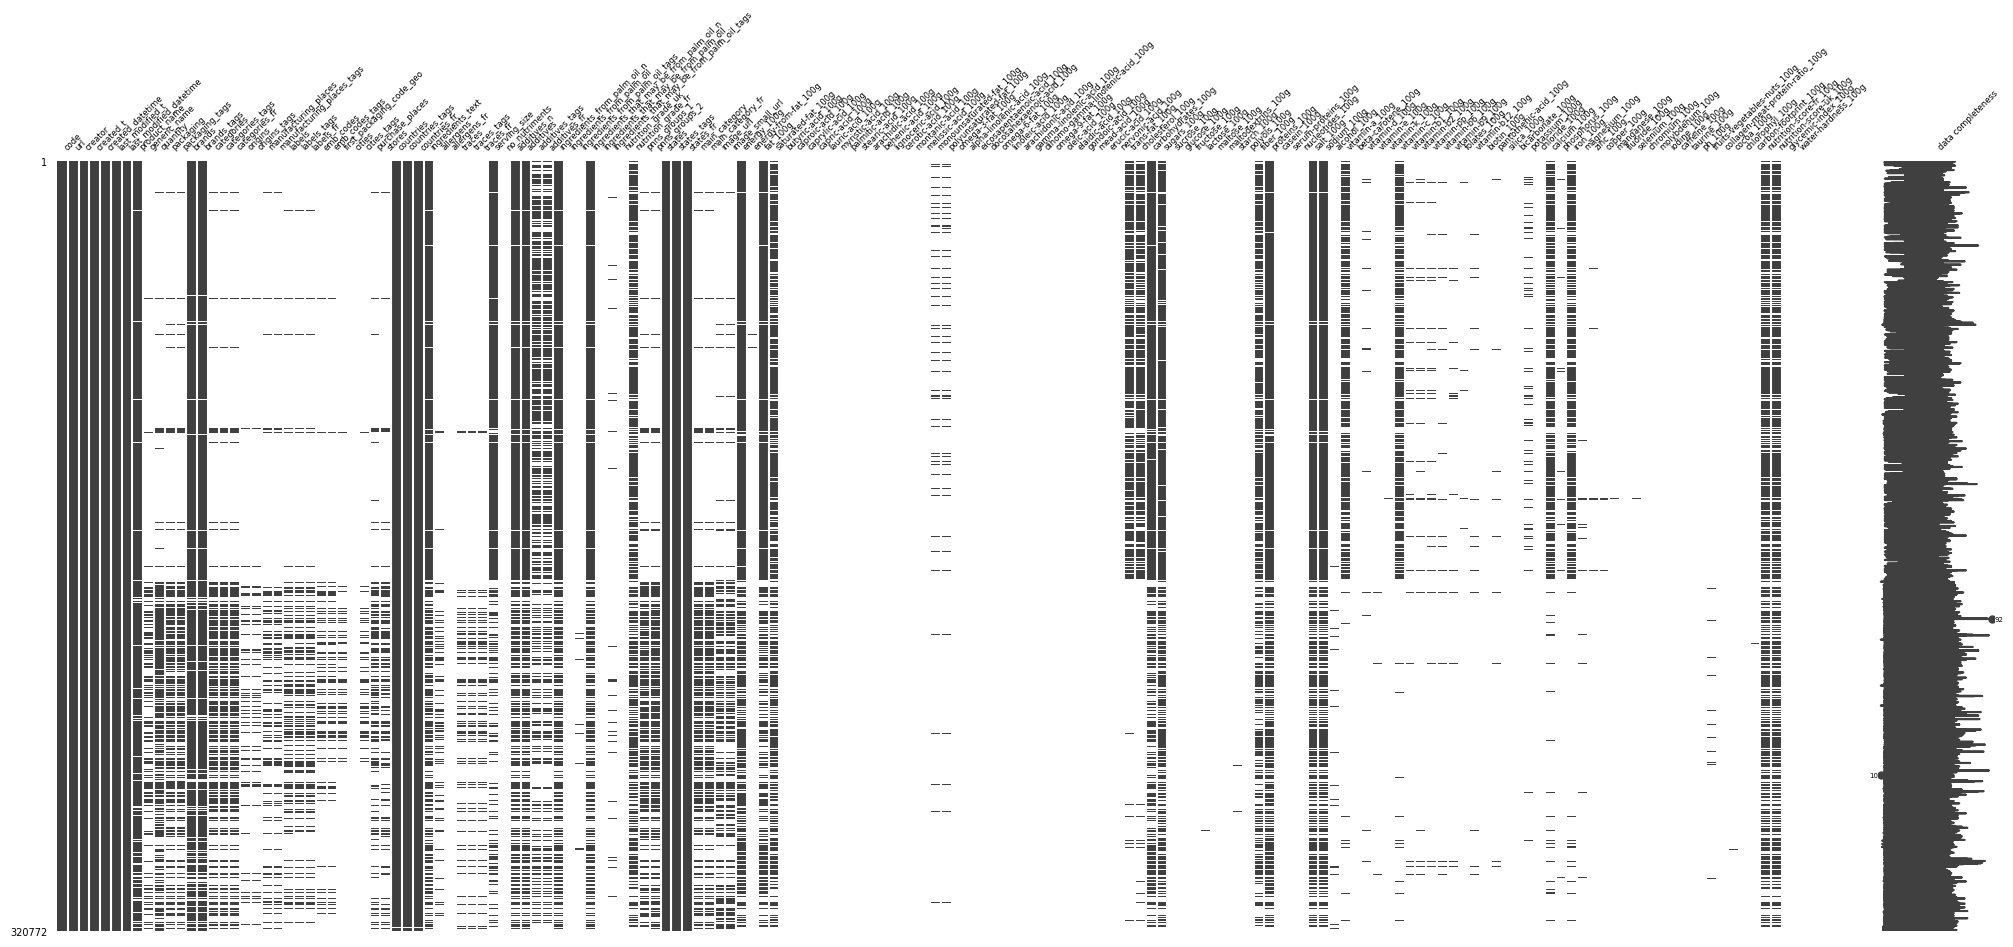

In [2]:
# missingno matrice avec label
import missingno as msno
msno.matrix(df, labels=True, fontsize=6)

<Axes: >

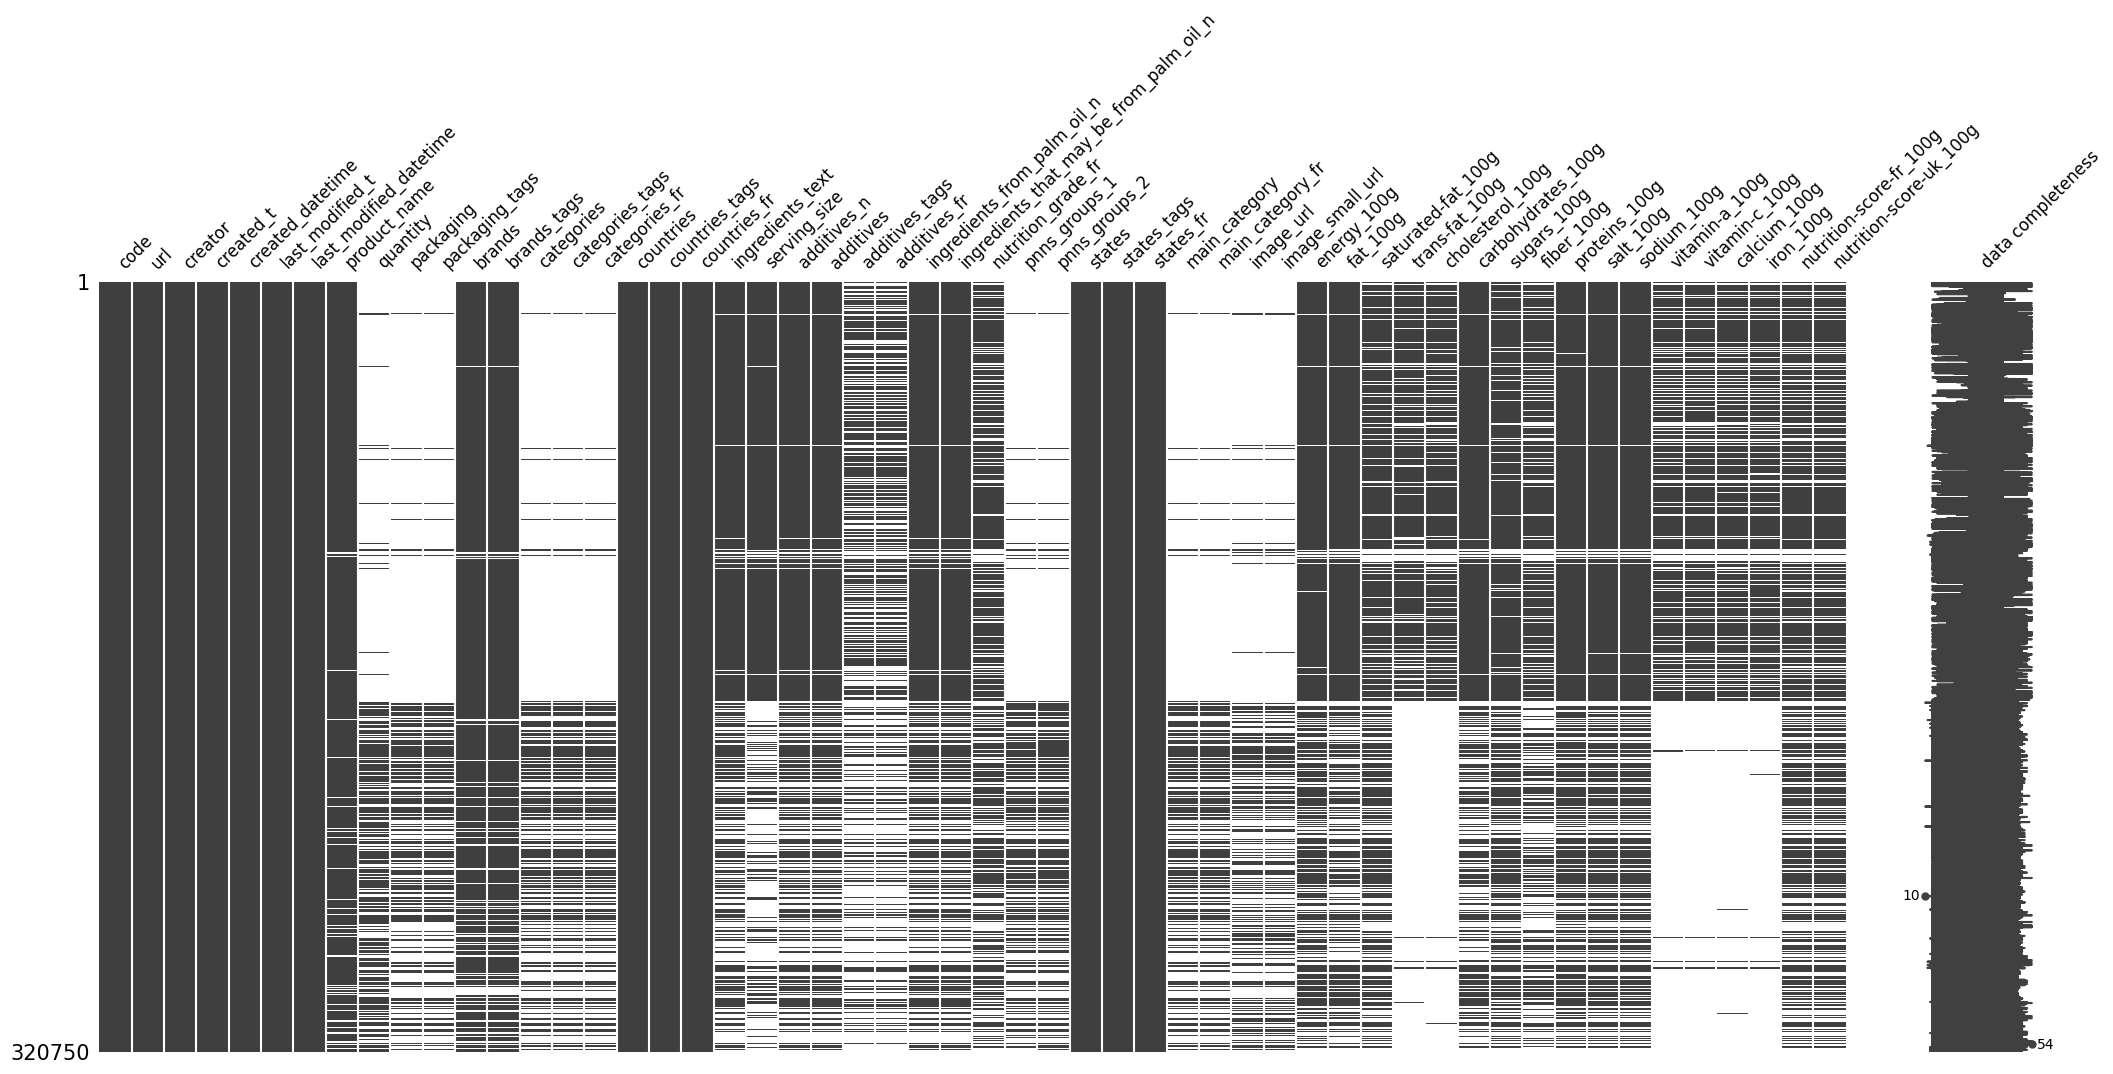

In [3]:
# On enlève les colonnes avec moins de 10% de valeurs présentes
df2_under_10 = df.dropna(thresh=0.2*df.shape[0], axis=1)
# On retire les doublons pour la catégorie code et on garde le premier
df2_under_10 = df2_under_10.drop_duplicates(subset='code', keep='first')
# On affiche les colonnes
msno.matrix(df2_under_10, labels=True, fontsize=12)

In [4]:
# Les pnns_groups_1 regroupe les différentes catégories de produits, cependant tout n'est pas orthographié de la même manière
df3_pnns = df2_under_10.copy()

# Nettoyage des valeurs de pnns_groups_1, enlever les - et mettre en majuscule, remplacer Unknown par NaN
df3_pnns['pnns_groups_1'] = df3_pnns['pnns_groups_1'].str.replace('-',' ').str.capitalize().replace('Unknown',np.nan)

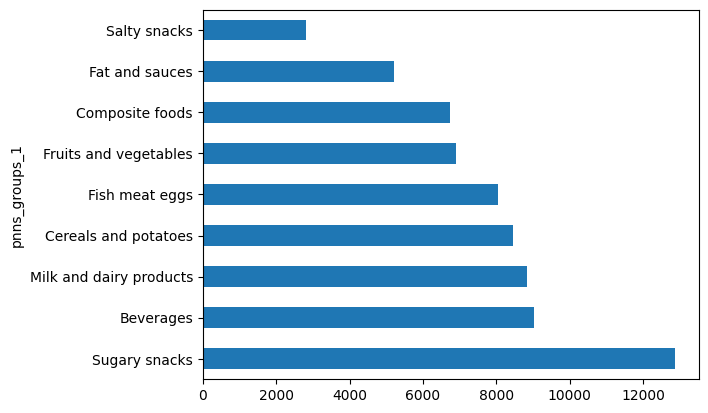

In [5]:
# Graphique
import matplotlib.pyplot as plt
df3_pnns['pnns_groups_1'].value_counts().plot(kind='barh')
plt.show()


Nous allons réaliser des box plots en fonction des data que nous avons et par catégorie pour voir si l'on peut prédire le jeu de donnée. A en juger par la matrice de missing no. Une bonne moitié d'entre eux sont présent malgré la présence des _100g. Peut être qu'une méthode de regression logistique pourrait fonctionner. On va réaliser quelques analyses complémentaires pour voir à l'oeil s'il y a quelques variations visuellement intéressantes.

<Axes: >

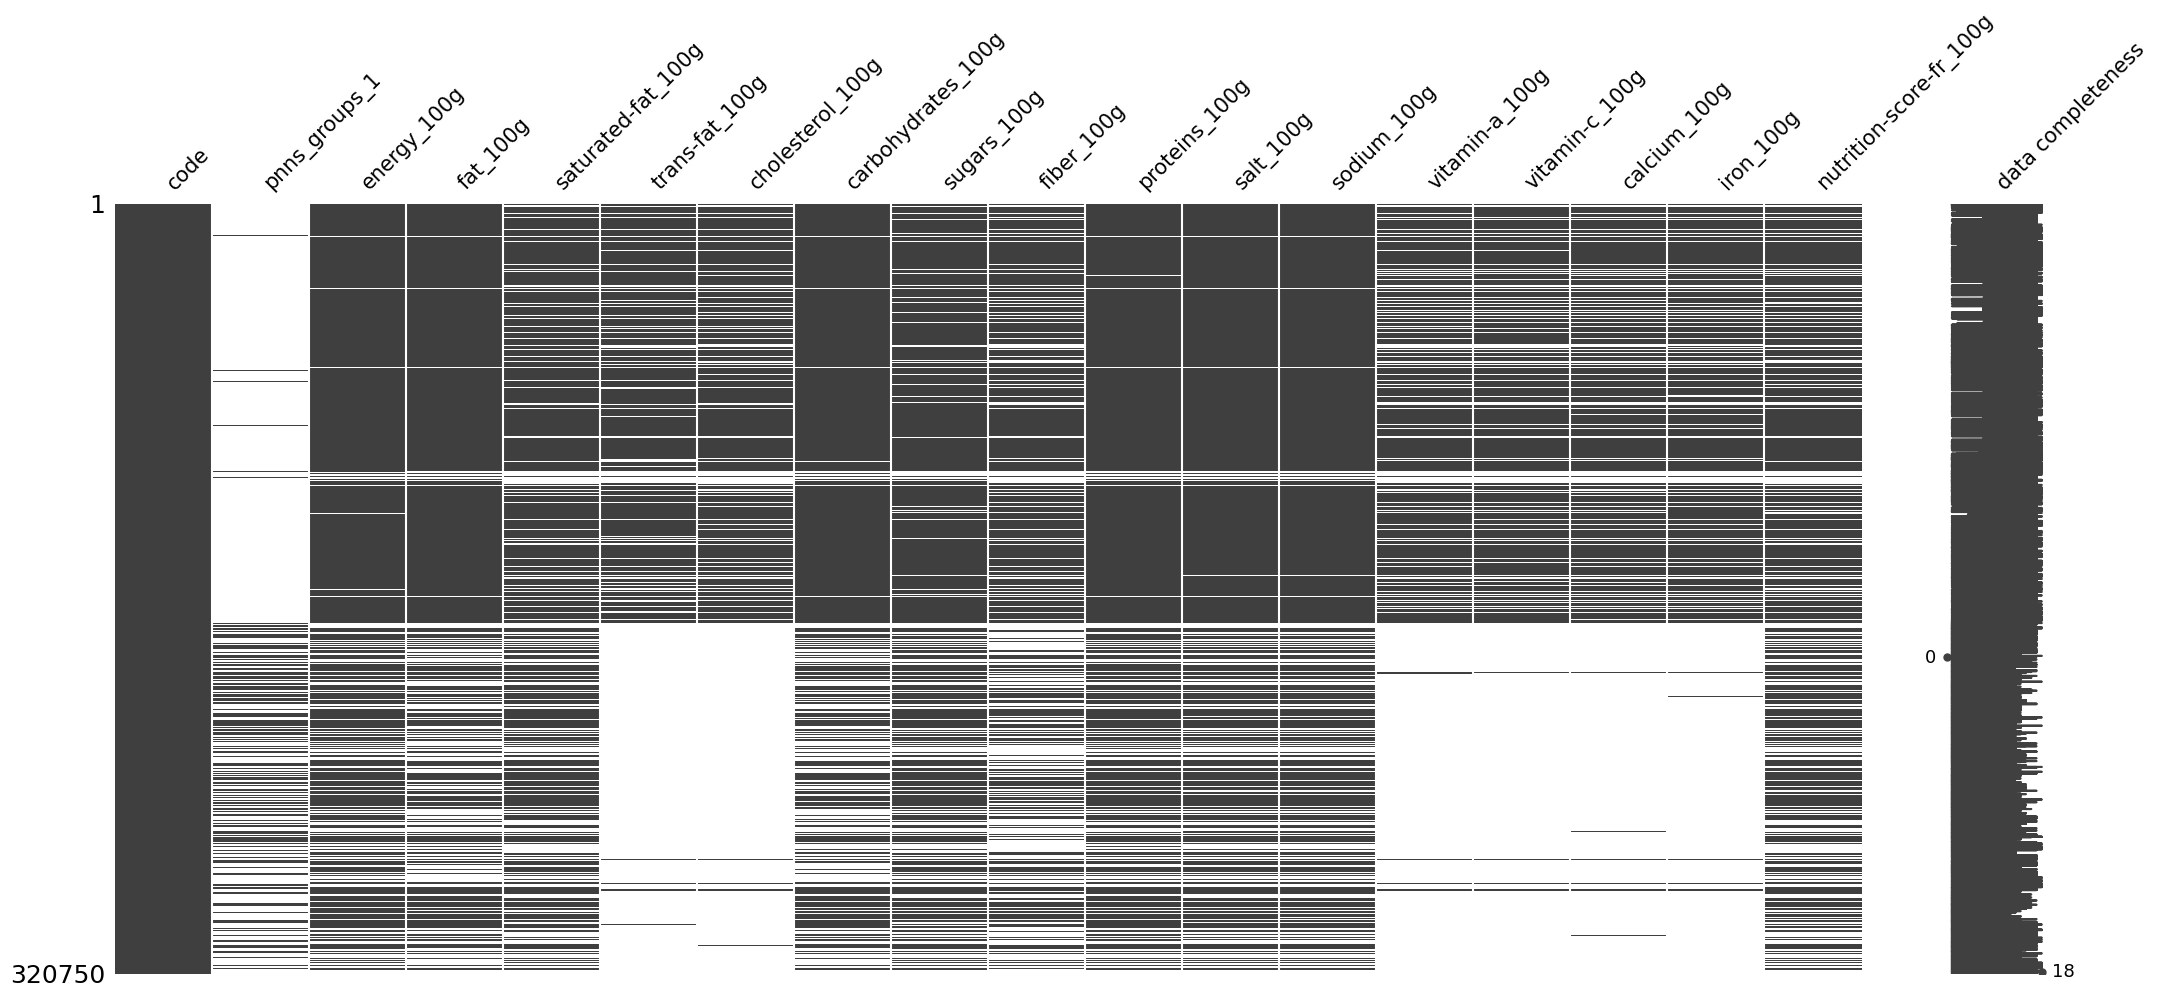

In [6]:
# Se débarasser des valeurs que l'on utilisera pas pour notre analyse (J'ai déjà réalisé le boxplot avec df3_pnns avant, et certaines données ne servait à rien, j'ai donc décidé d'itérer les graphiques qui viendront après avec df4 et df5)
df4_drop = df3_pnns.drop(columns=['url', 'creator', 'created_t', 'created_datetime',
       'last_modified_t', 'last_modified_datetime', 'product_name', 'quantity', 'packaging', 'packaging_tags', 'brands',
       'brands_tags', 'categories', 'categories_tags', 'categories_fr', 'countries',
       'countries_tags', 'countries_fr', 'ingredients_text', 'serving_size',
       'additives_n', 'additives', 'additives_tags', 'additives_fr',
       'ingredients_from_palm_oil_n',
       'ingredients_that_may_be_from_palm_oil_n', 'nutrition_grade_fr', 'pnns_groups_2', 'states', 'states_tags', 'states_fr',
       'main_category', 'main_category_fr', 'image_url', 'image_small_url', 'nutrition-score-uk_100g'])
msno.matrix(df4_drop, labels=True, fontsize=15)

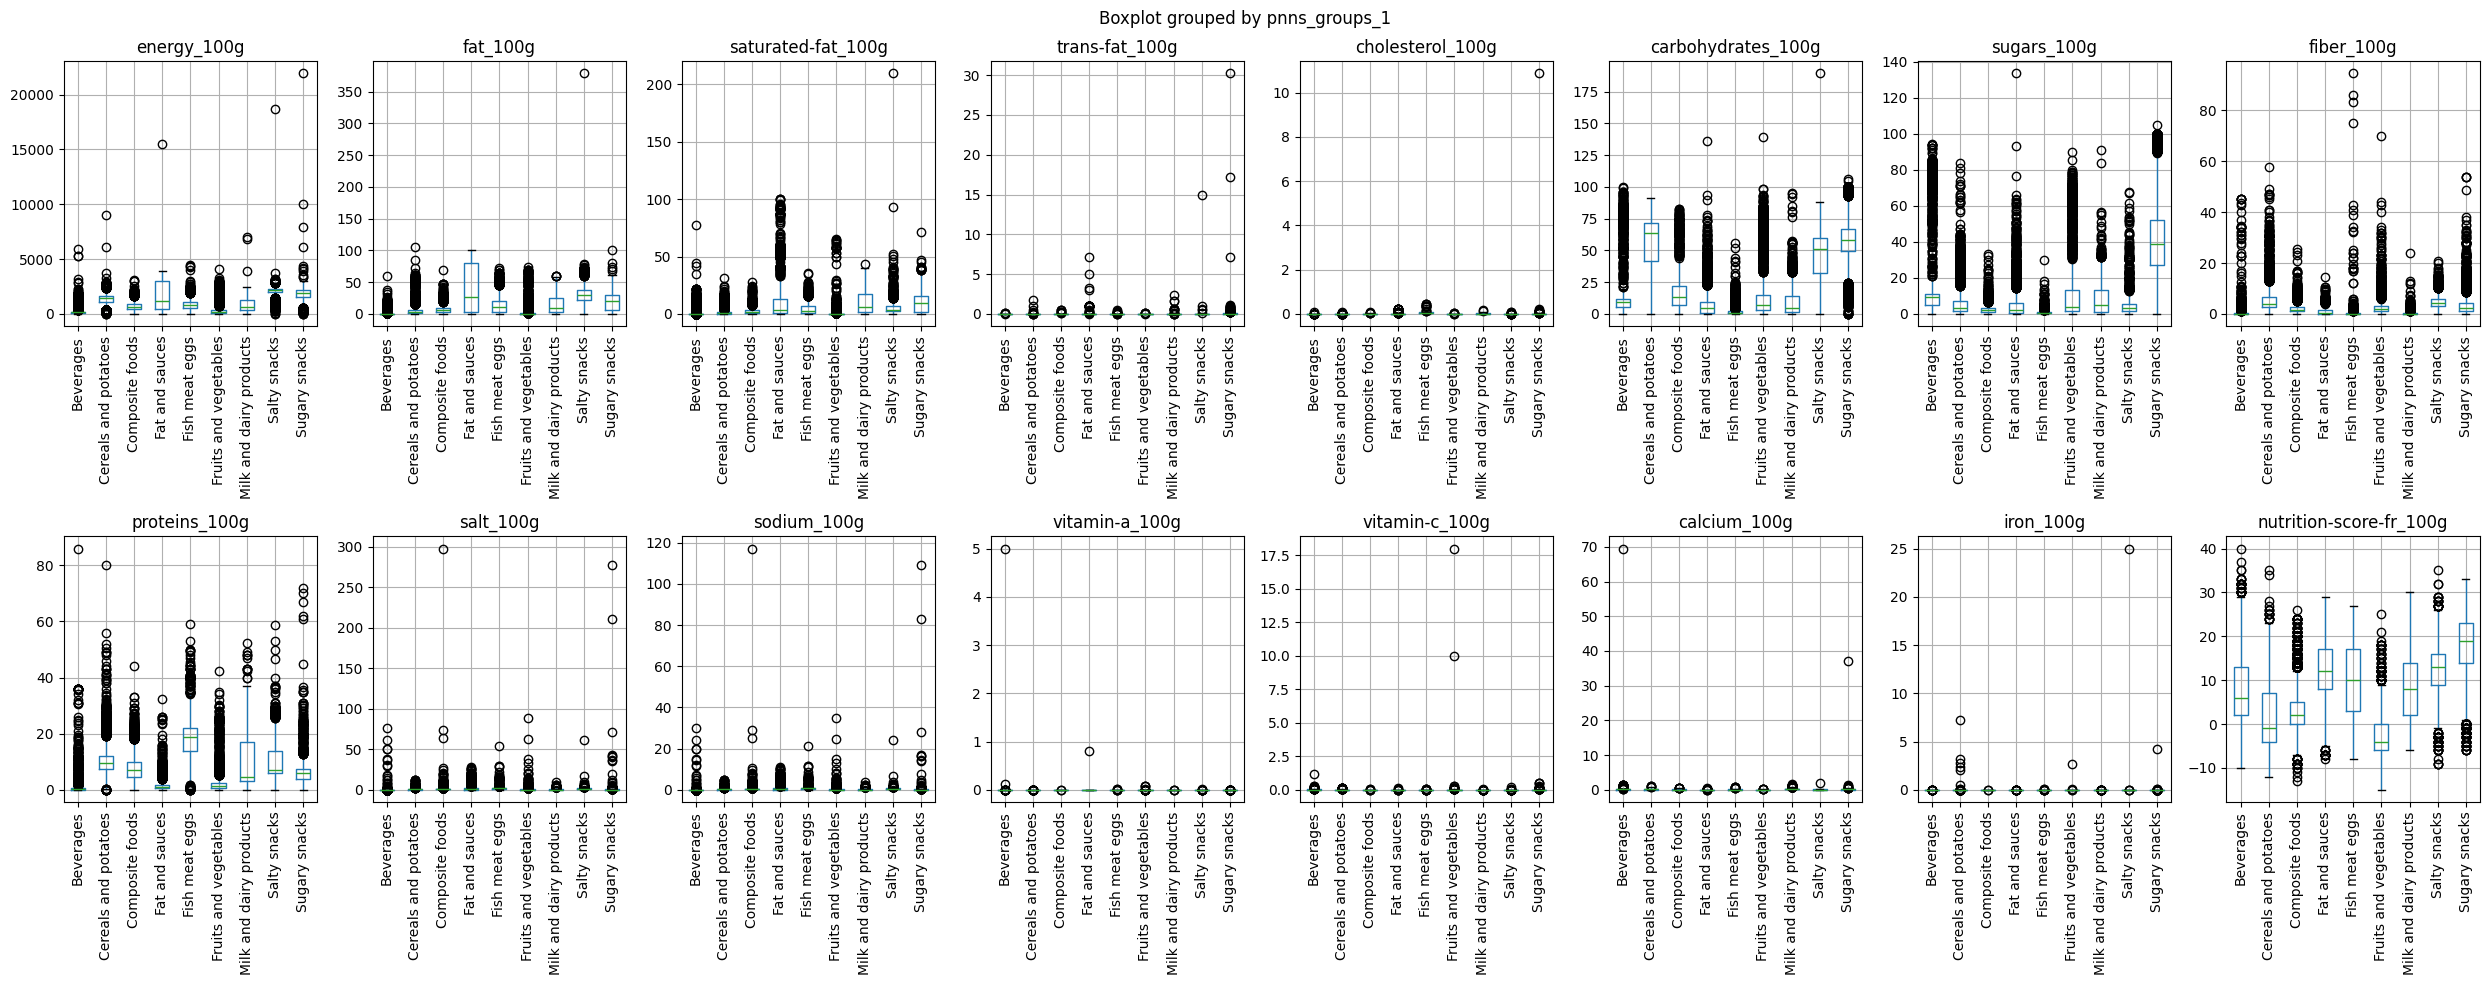

In [7]:
# Box plot pour chaque variable numérique et en fonction des catégories
import matplotlib.pyplot as plt

# Créations de variables pour afficher les boxplots en tableau et réduire l'espace occupé par les graphiques
num_cols = 8
num_rows = int(np.ceil(len(df4_drop.select_dtypes(include=['float64']).columns) / num_cols))


# Créer la figure et les axes
fig, axes = plt.subplots(num_rows, num_cols, figsize=(25, 5*num_rows))

# Aplatir les axes pour faciliter l'indexation
axes = axes.flatten()

# Boucle pour créer les boxplots
for i, col in enumerate(df4_drop.select_dtypes(include=['float64']).columns):
    df4_drop.boxplot(column=col, by='pnns_groups_1', ax=axes[i])
    axes[i].set_title(col)
    axes[i].set_xlabel('')
    axes[i].tick_params(axis='x', labelrotation=90)

# Supprimer les axes inutilisés
for j in range(i+1, num_cols*num_rows):
    fig.delaxes(axes[j])

# Afficher la figure
plt.tight_layout()
plt.show()

In [8]:
import numpy as np

df5_IQR = df4_drop.copy()

for category in df5_IQR['pnns_groups_1'].unique():
    category_data = df5_IQR[df5_IQR['pnns_groups_1'] == category]
    for col in df5_IQR.select_dtypes(include=['float64']).columns:
        Q1 = category_data[col].quantile(0.25)
        Q3 = category_data[col].quantile(0.75)
        IQR = Q3 - Q1
        lower_bound = Q1 - 1.5 * IQR
        upper_bound = Q3 + 1.5 * IQR

        # Remplacement des valeurs aberrantes par NaN pour la catégorie et la colonne courantes
        df5_IQR.loc[(df5_IQR['pnns_groups_1'] == category) & 
                    ((df5_IQR[col] < lower_bound) | (df5_IQR[col] > upper_bound)), col] = np.nan

# On affiche le nombre de valeurs remplacées par NaN
print(f"Nombre de valeurs remplacées par NaN : {df5_IQR.isna().sum().sum()}")


Nombre de valeurs remplacées par NaN : 2147209


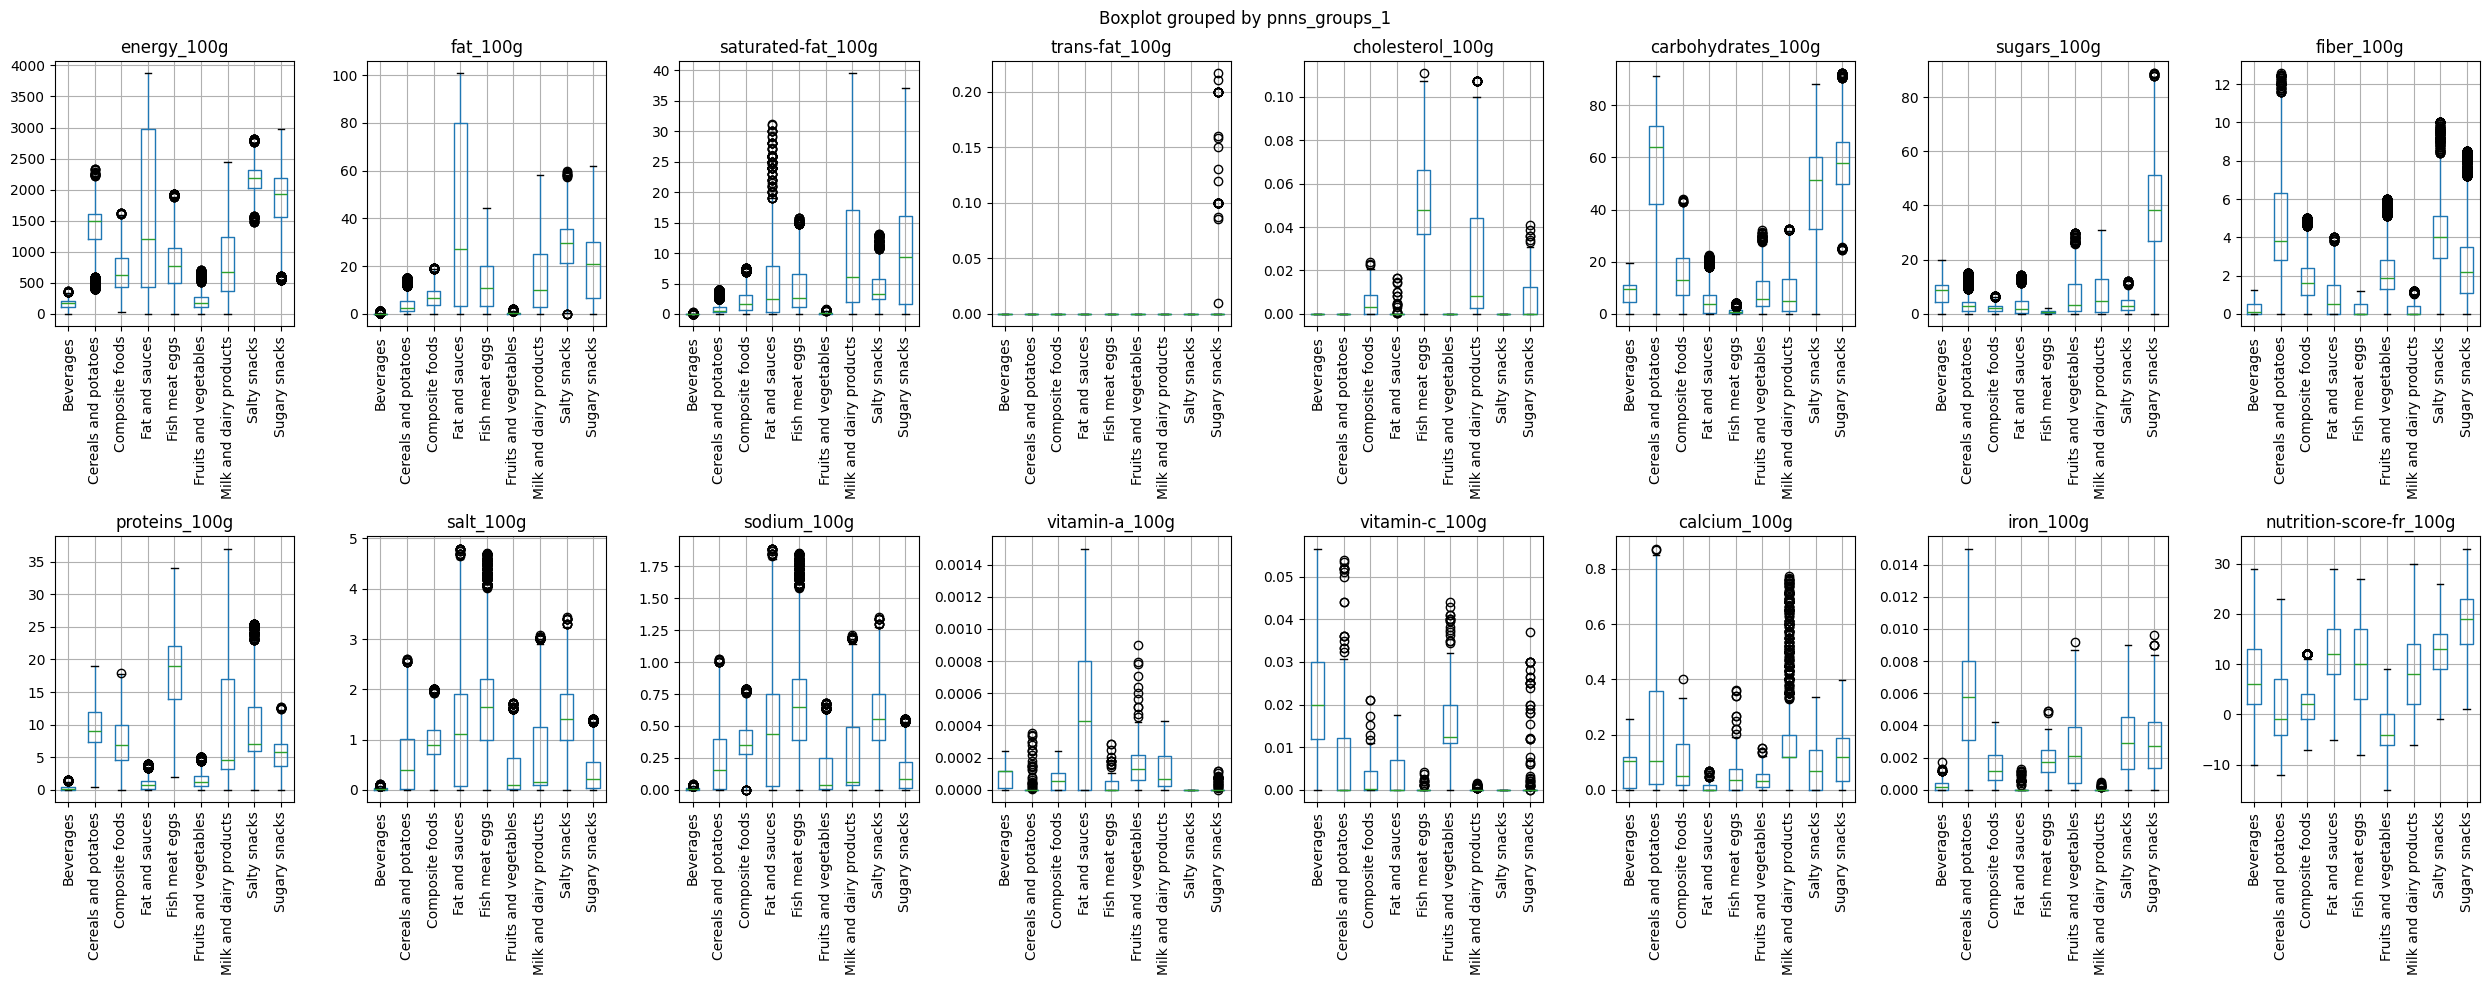

In [9]:
# On refait les boxplots avec df5_IQR
num_cols = 8
num_rows = int(np.ceil(len(df5_IQR.select_dtypes(include=['float64']).columns) / num_cols))

fig, axes = plt.subplots(num_rows, num_cols, figsize=(25, 5*num_rows))
axes = axes.flatten()

for i, col in enumerate(df5_IQR.select_dtypes(include=['float64']).columns):
    df5_IQR.boxplot(column=col, by='pnns_groups_1', ax=axes[i])
    axes[i].set_title(col)
    axes[i].set_xlabel('')
    axes[i].tick_params(axis='x', labelrotation=90)

for j in range(i+1, num_cols*num_rows):
    fig.delaxes(axes[j])

plt.tight_layout()
plt.show()    

Après notre nettoyage, on peut voir qu'une très grande proportion des outliers ont correctement été remplacé par des NaN. C'est une bonne nouvelle car ça va améliorer la pertinence de l'analyse suivante. Qui nous permettra de créer je l'espère des pnns groups.

Le découpage réalisé ne me satisfait pas, sans chercher très loin je pense qu'un coude à 3/4 valeurs semblent indiquer qu'à part des variables importantes comme l'énergie, le gras, le sucre et peut être les protéines il n'y aurait pas beaucoup d'influence. Ca peut paraitre envisageable mais pour conforter mes positions je vais réaliser d'autres analyse.

Nombre de valeurs remplacées par NaN : 2202856


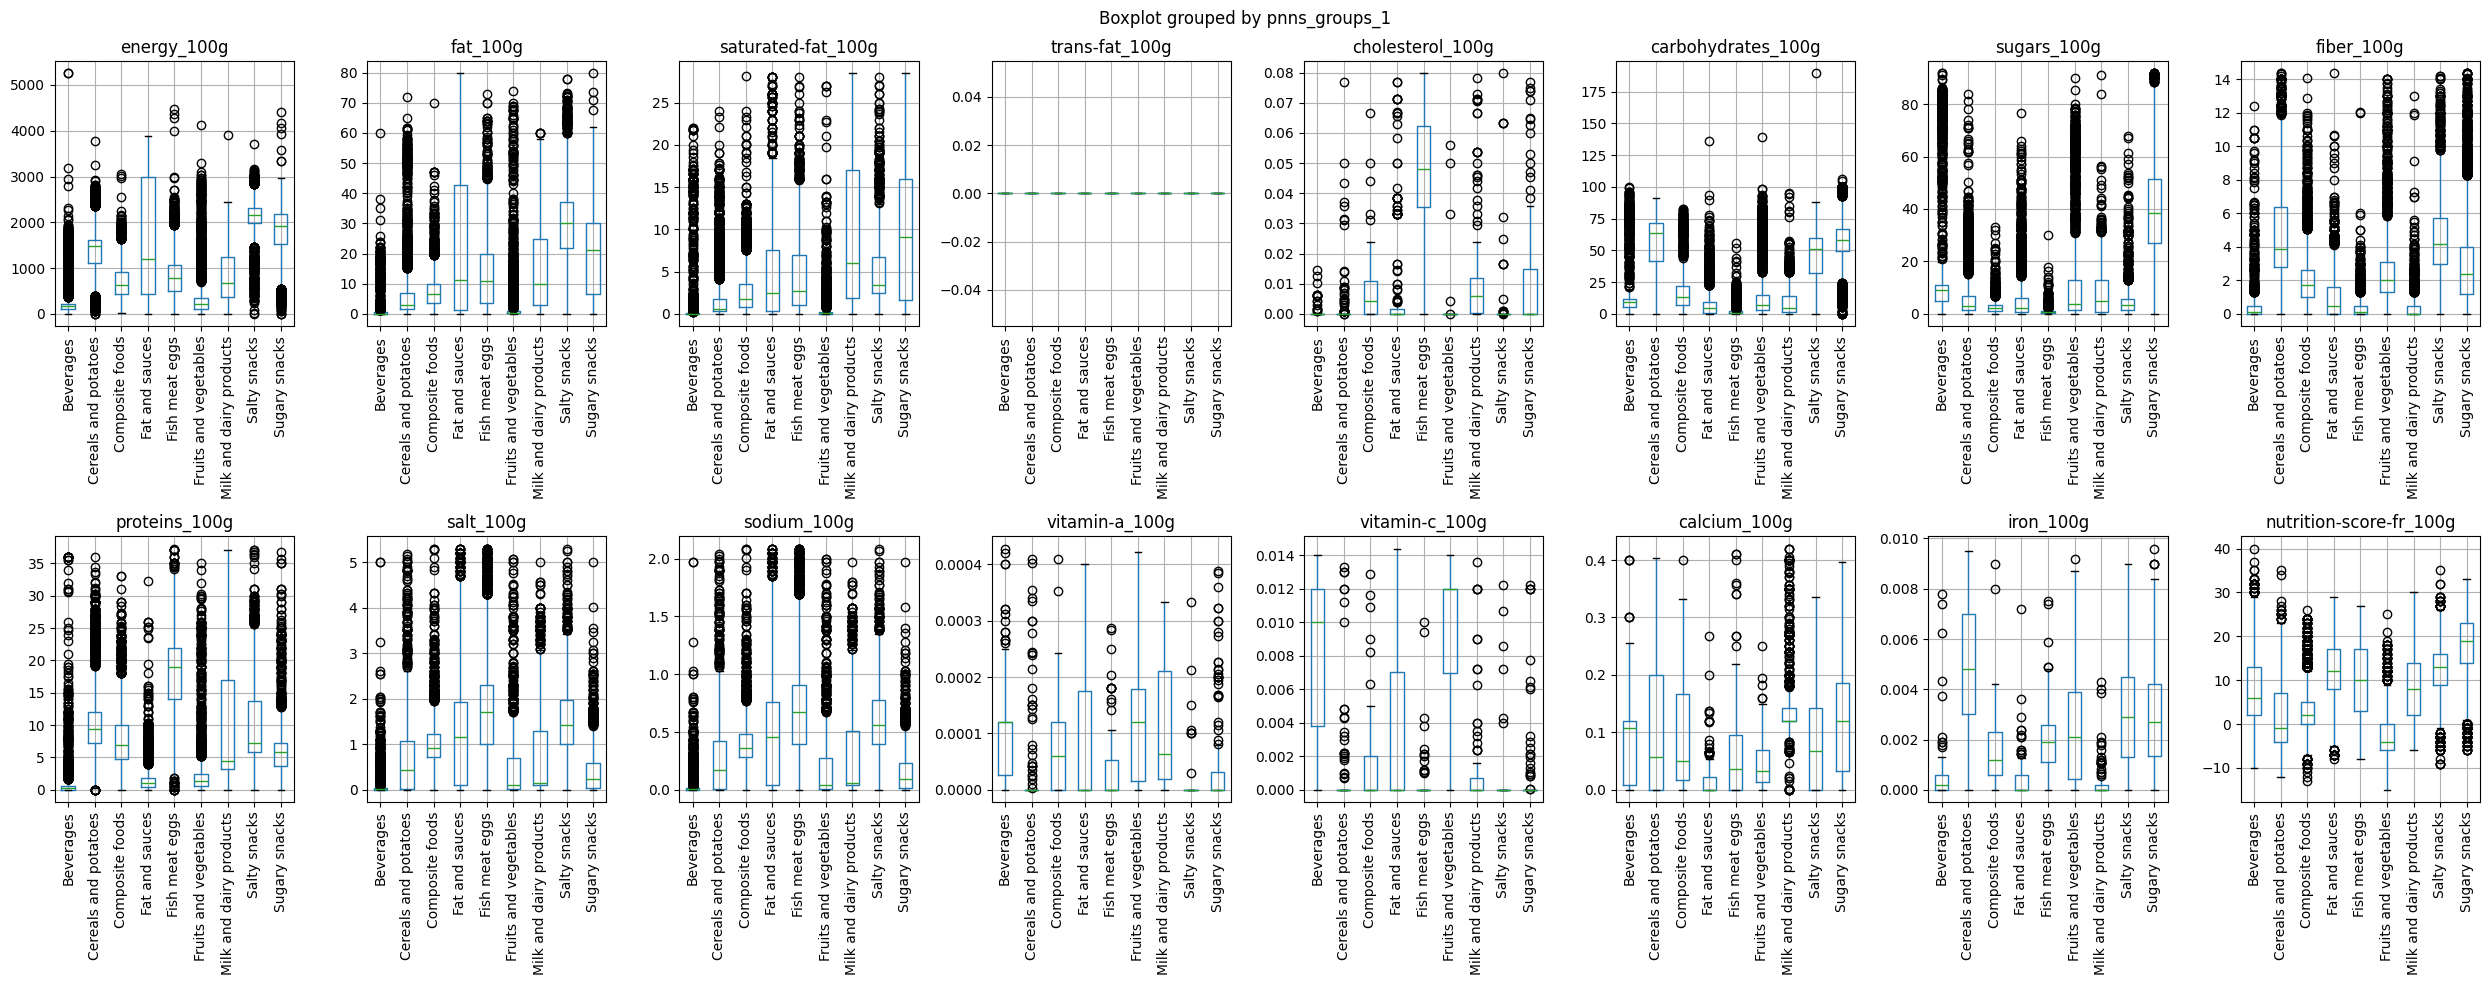

In [10]:
# filtre plus aggressif pour les outliers
df6_IQR = df4_drop.copy()

# quartile
Q1 = df6_IQR.select_dtypes(include=['float64']).quantile(0.25)
Q3 = df6_IQR.select_dtypes(include=['float64']).quantile(0.75)
IQR = Q3 - Q1
lower_bound = Q1 - 3 * IQR
upper_bound = Q3 + 3 * IQR

for col in df6_IQR.select_dtypes(include=['float64']).columns:
    df6_IQR.loc[(df6_IQR[col] < lower_bound[col]) | (df6_IQR[col] > upper_bound[col]), col] = np.nan

print(f"Nombre de valeurs remplacées par NaN : {df6_IQR.isna().sum().sum()}")
# On refait les boxplots avec df6_IQR
num_cols = 8
num_rows = int(np.ceil(len(df6_IQR.select_dtypes(include=['float64']).columns) / num_cols))
fig, axes = plt.subplots(num_rows, num_cols, figsize=(25, 5*num_rows))
axes = axes.flatten()

for i, col in enumerate(df6_IQR.select_dtypes(include=['float64']).columns):
    df6_IQR.boxplot(column=col, by='pnns_groups_1', ax=axes[i])
    axes[i].set_title(col)
    axes[i].set_xlabel('')
    axes[i].tick_params(axis='x', labelrotation=90)

for j in range(i+1, num_cols*num_rows):
    fig.delaxes(axes[j])

plt.tight_layout()
plt.show()


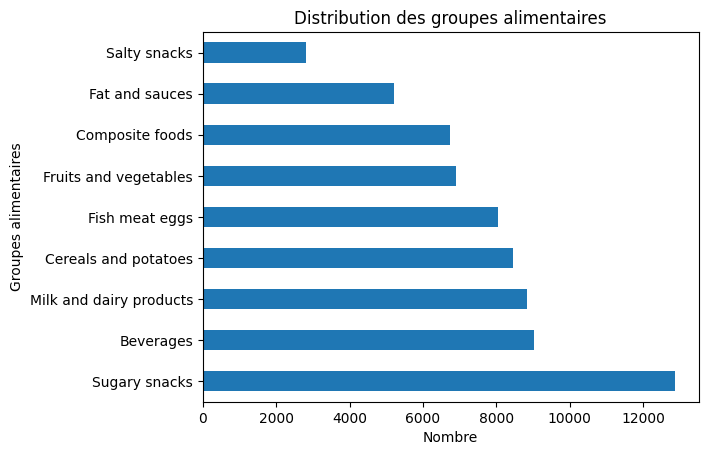

In [11]:
df6_IQR['pnns_groups_1'].value_counts().plot(kind='barh')
plt.xlabel('Nombre')
plt.ylabel('Groupes alimentaires')
plt.title('Distribution des groupes alimentaires')
plt.show()


In [12]:
from sklearn.preprocessing import StandardScaler
df10_pca = df6_IQR.copy()
df10_pca = df10_pca[df10_pca['code'] != '3257983115628'] # On retire la ligne avec le code 3257983115628 car cet individu a été identifié comme outlier dans une analyse précédente
df10_pca = df10_pca.select_dtypes(include=['float64'])

# remplacement des NaN par la médiane
df10_pca = df10_pca.fillna(df10_pca.median())

# Standardisation des données
scaler = StandardScaler()
X10 = df10_pca.select_dtypes(include=['float64'])
X10_scaled = scaler.fit_transform(X10)


In [13]:
# Réduction de dimension avec PCA
from sklearn.decomposition import PCA

pca = PCA()
X10_pca = pca.fit_transform(X10_scaled)

# Création d'un DataFrame pour visualiser les composantes principales
df10_pca = pd.DataFrame(X10_pca, columns=[f"PC{i+1}" for i in range(X10_pca.shape[1])])
print(df10_pca.head())

        PC1       PC2       PC3       PC4       PC5       PC6       PC7  \
0 -0.768685  0.033952 -0.168763 -0.257855 -0.537054 -0.009912  0.130065   
1  1.112178  1.930524 -0.214176  0.223937 -0.412945  0.237182 -1.261471   
2  0.951705  1.234200  2.561483  0.018202 -0.187004 -0.136315 -0.799864   
3  4.341798  0.458234  3.896425  0.850208 -1.311475  0.215100  1.109325   
4  0.149661  1.392811  1.081570 -0.686213  0.194035  0.019394 -0.794608   

        PC8       PC9      PC10      PC11      PC12      PC13      PC14  \
0 -0.015806  0.127343  0.004414  0.212934 -0.107378  0.414055 -0.001553   
1 -0.733702 -0.550103 -0.895070  1.348217  0.328866  0.277536 -0.558703   
2  0.436231 -1.670645  0.793136  0.221734  0.430137 -0.110302  0.147656   
3 -0.609433  0.896109 -0.761320  0.437564  1.611627  0.066261 -0.078913   
4  0.479547 -1.003703  0.186778  0.361716 -1.084577  0.477976 -0.691541   

       PC15          PC16  
0  0.000825 -1.074533e-15  
1 -0.000992  1.128269e-15  
2  0.000094 -5

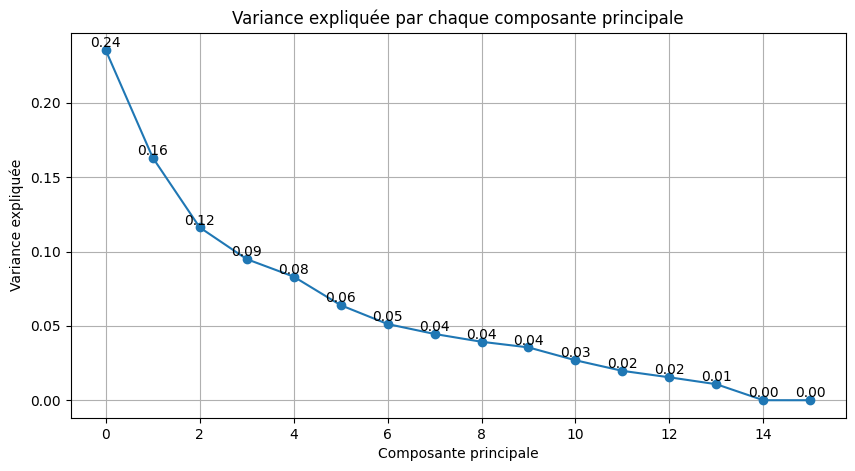

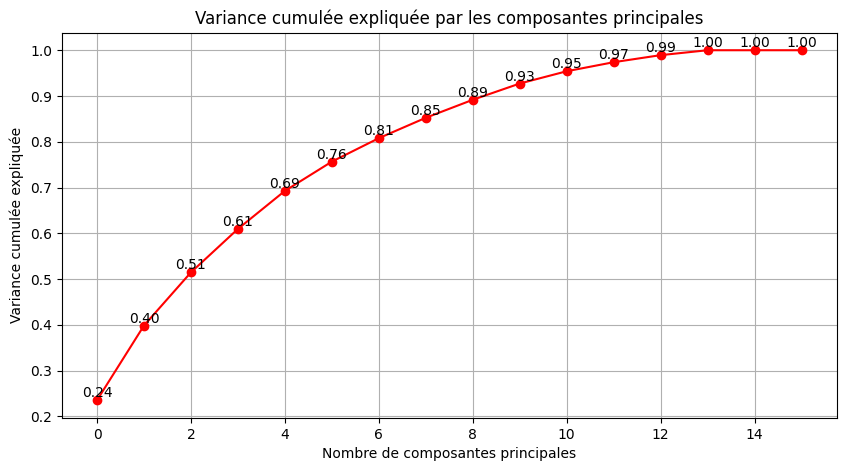

In [14]:
# Affichage de la variance expliquée par chaque composante principale
plt.figure(figsize=(10, 5))
plt.plot(pca.explained_variance_ratio_, marker='o')
plt.title('Variance expliquée par chaque composante principale')
plt.xlabel('Composante principale')
plt.ylabel('Variance expliquée')
for i, v in enumerate(pca.explained_variance_ratio_):
    plt.text(i, v, f"{v:.2f}", ha='center', va='bottom')
plt.grid(True)
plt.show()


# Affichage de la variance cumulée expliquée par les composantes principales
plt.figure(figsize=(10, 5))
plt.plot(np.cumsum(pca.explained_variance_ratio_), marker='o', color='red')
plt.title('Variance cumulée expliquée par les composantes principales')
plt.xlabel('Nombre de composantes principales')
plt.ylabel('Variance cumulée expliquée')
for i, v in enumerate(np.cumsum(pca.explained_variance_ratio_)):
    plt.text(i, v, f"{v:.2f}", ha='center', va='bottom')
plt.grid(True)
plt.show()


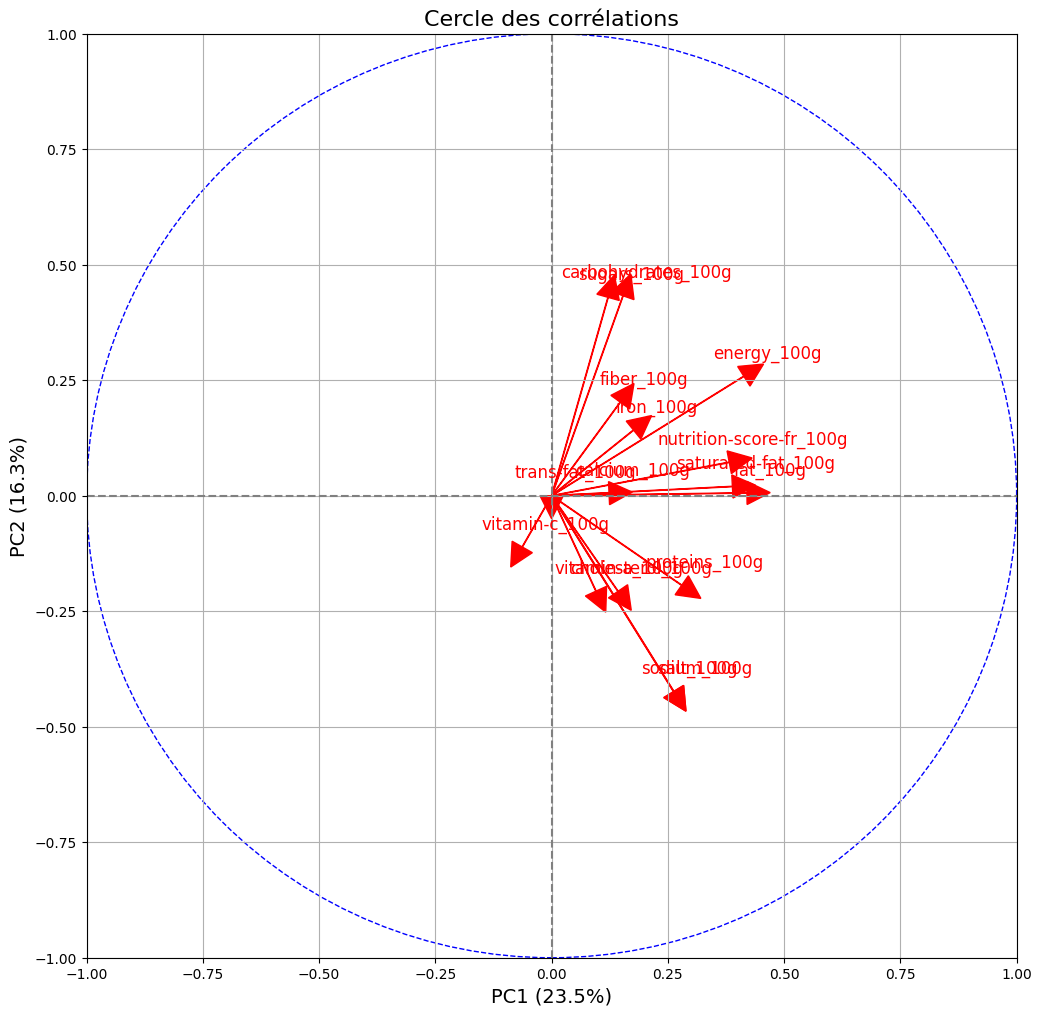

In [15]:
# Graphique des corrélations

def correlation_graph(pca, features):
    plt.figure(figsize=(12, 12))
    for i in range(pca.components_.shape[1]):
        plt.arrow(0, 0, pca.components_[0, i], pca.components_[1, i], 
                  head_width=0.05, head_length=0.05, color='red')
        plt.text(pca.components_[0, i] + 0.05, pca.components_[1, i] + 0.05, 
                 features[i], color='red', ha='center', va='center', fontsize=12)
    plt.xlim(-1, 1)
    plt.ylim(-1, 1)
    plt.xlabel(f'PC1 ({pca.explained_variance_ratio_[0]*100:.1f}%)', fontsize=14)
    plt.ylabel(f'PC2 ({pca.explained_variance_ratio_[1]*100:.1f}%)', fontsize=14)
    plt.grid()
    plt.axhline(0, color='grey', ls='--')
    plt.axvline(0, color='grey', ls='--')
    circle = plt.Circle((0, 0), 1, facecolor='none', edgecolor='b', ls='--')
    plt.gca().add_artist(circle)
    plt.title('Cercle des corrélations', fontsize=16)
    plt.show()


# Appel de la fonction avec les colonnes numériques de votre DataFrame
correlation_graph(pca, X10.columns)


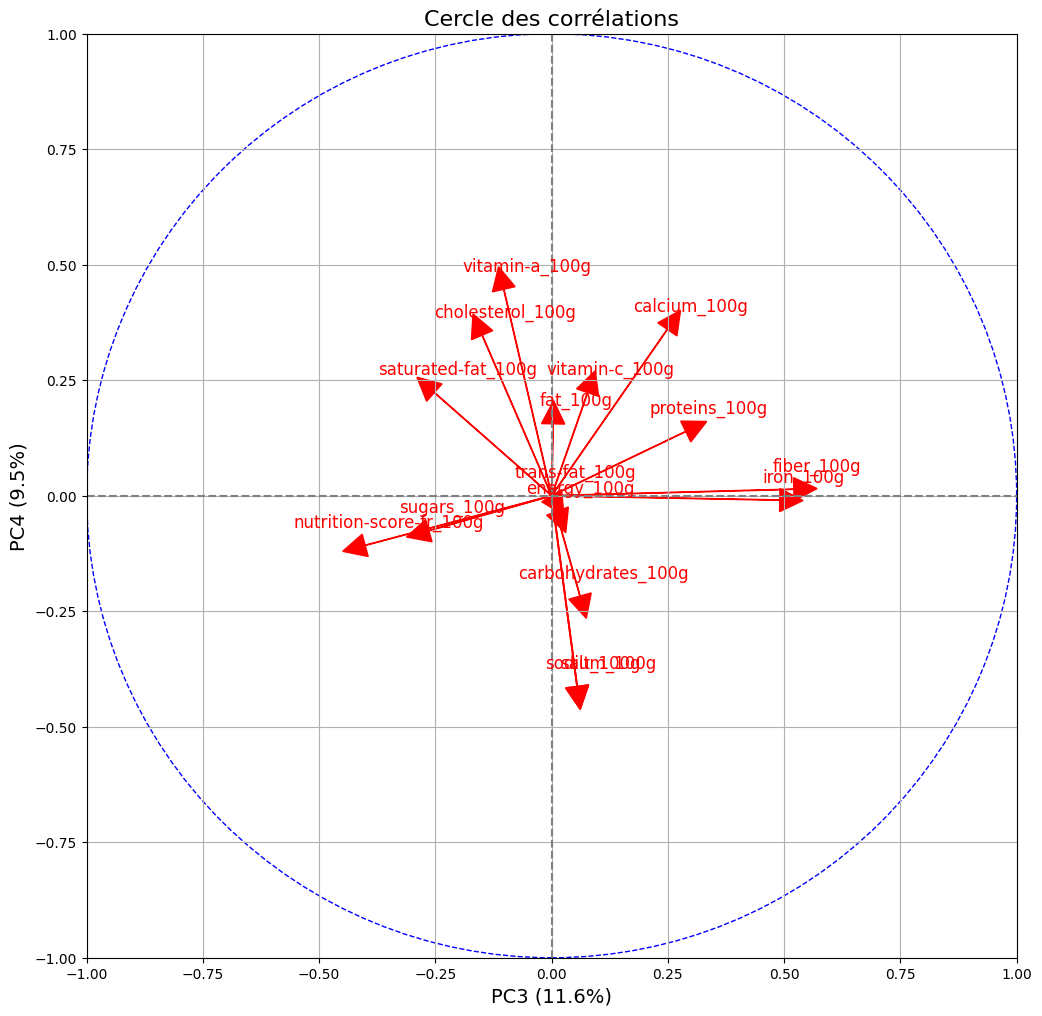

In [16]:
# cercle des corrélations pour les composantes principales 3 et 4
plt.figure(figsize=(12, 12))
for i in range(pca.components_.shape[1]):
    plt.arrow(0, 0, pca.components_[2, i], pca.components_[3, i], 
              head_width=0.05, head_length=0.05, color='red')
    plt.text(pca.components_[2, i] + 0.05, pca.components_[3, i] + 0.05, 
             X10.columns[i], color='red', ha='center', va='center', fontsize=12)
    
plt.xlim(-1, 1)
plt.ylim(-1, 1)
plt.xlabel(f'PC3 ({pca.explained_variance_ratio_[2]*100:.1f}%)', fontsize=14)
plt.ylabel(f'PC4 ({pca.explained_variance_ratio_[3]*100:.1f}%)', fontsize=14)
plt.grid()
plt.axhline(0, color='grey', ls='--')
plt.axvline(0, color='grey', ls='--')
circle = plt.Circle((0, 0), 1, facecolor='none', edgecolor='b', ls='--')
plt.gca().add_artist(circle)
plt.title('Cercle des corrélations', fontsize=16)
plt.show()

# On garde les 4 premières composantes principales
df10_pca = df10_pca.iloc[:, :4]

# On ajoute les colonnes de catégorie et de code
df10_pca['pnns_groups_1'] = df6_IQR['pnns_groups_1']
df10_pca['code'] = df6_IQR['code']




# Interprétation
Il semble que l'on peut regrouper certaines valeurs pour les 4 premières composantes principales, je vais quand même tenter une dernière interprétation avec les PC5 et 6 pour voir

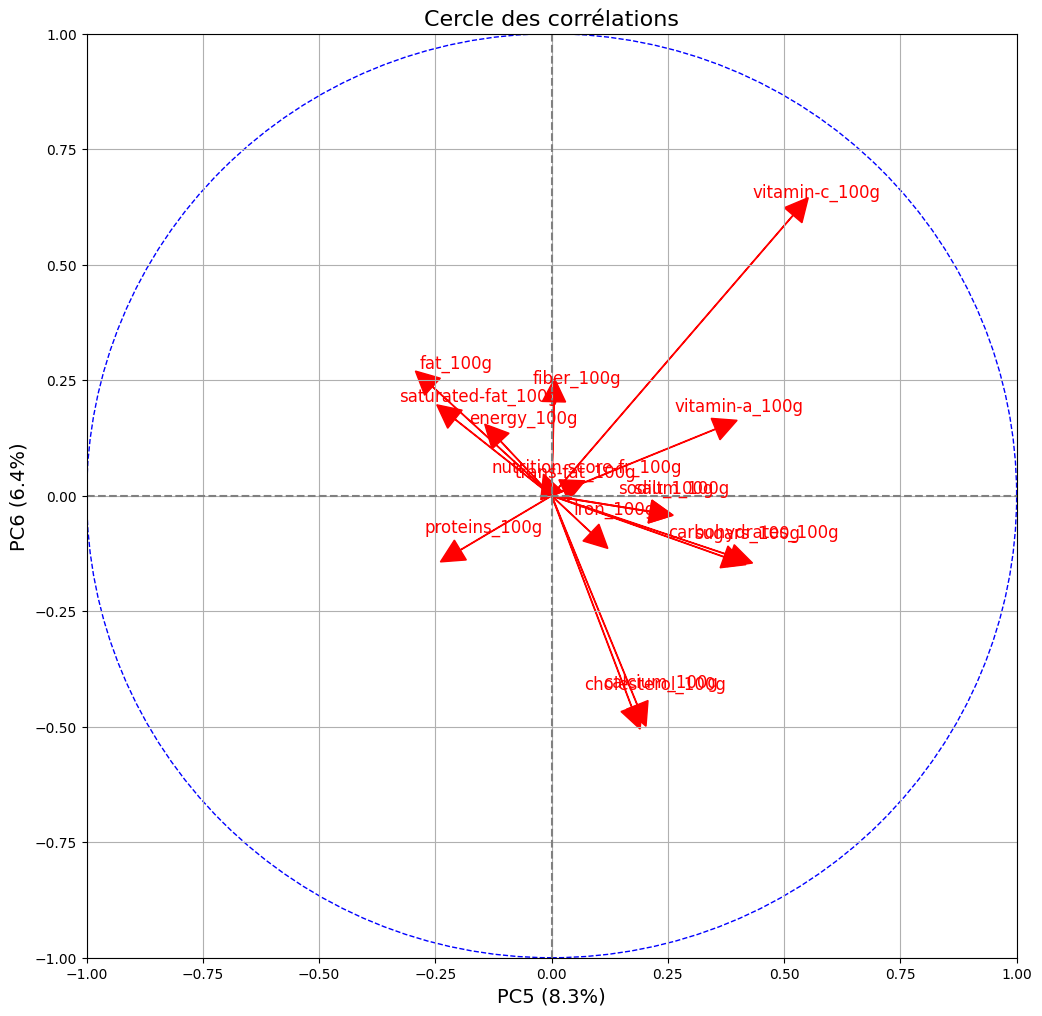

In [17]:
# On affiche les composantes principales PC5 et PC6
plt.figure(figsize=(12, 12))
for i in range(pca.components_.shape[1]):
    plt.arrow(0, 0, pca.components_[4, i], pca.components_[5, i], 
              head_width=0.05, head_length=0.05, color='red')
    plt.text(pca.components_[4, i] + 0.05, pca.components_[5, i] + 0.05, 
             X10.columns[i], color='red', ha='center', va='center', fontsize=12)
    
plt.xlim(-1, 1)
plt.ylim(-1, 1)
plt.xlabel(f'PC5 ({pca.explained_variance_ratio_[4]*100:.1f}%)', fontsize=14)
plt.ylabel(f'PC6 ({pca.explained_variance_ratio_[5]*100:.1f}%)', fontsize=14)
plt.grid()
plt.axhline(0, color='grey', ls='--')
plt.axvline(0, color='grey', ls='--')
circle = plt.Circle((0, 0), 1, facecolor='none', edgecolor='b', ls='--')
plt.gca().add_artist(circle)
plt.title('Cercle des corrélations', fontsize=16)
plt.show()


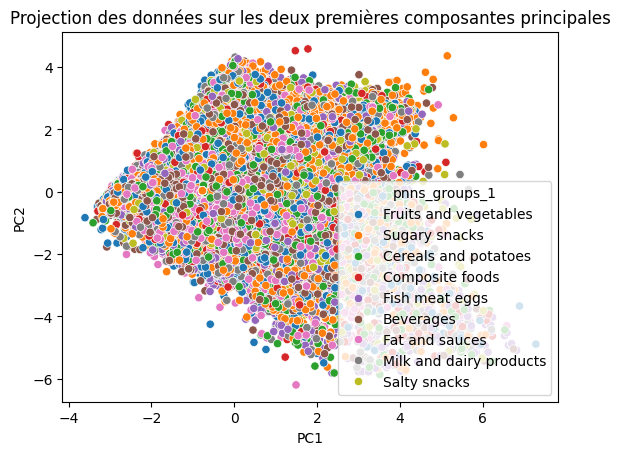

In [18]:
import seaborn as sns

sns.scatterplot(x=df10_pca['PC1'], y=df10_pca['PC2'], hue=df10_pca['pnns_groups_1'])
plt.xlabel('PC1')
plt.ylabel('PC2')
plt.title('Projection des données sur les deux premières composantes principales')
plt.show()


In [19]:
import statsmodels.api as sm
from statsmodels.formula.api import ols

# Exemple pour PC1
model = ols('PC1 ~ C(pnns_groups_1)', data=df10_pca).fit()
anova_table = sm.stats.anova_lm(model, typ=2)
print(anova_table)

                         sum_sq       df           F  PR(>F)
C(pnns_groups_1)    6487.951239      8.0  337.071084     0.0
Residual          165701.399115  68870.0         NaN     NaN


L'anova a été faite pour la forme, les données ne sont pas distribuées à mon avis autour d'une normale.